In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create the dataset
np.random.seed(42)

data = {
    'customerID': range(1, 101),
    'age': np.random.randint(18, 70, size=100),
    'annualIncome': np.random.randint(15000, 100000, size=100),
    'spendingScore': np.random.randint(1, 100, size=100)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Select features for clustering
X = df[['age', 'annualIncome', 'spendingScore']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Debugging: Verify data structure
print("X_scaled type:", type(X_scaled))
print("X_scaled shape:", X_scaled.shape)
print("X_scaled sample:\n", X_scaled[:5])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, init="k-means++", algorithm="lloyd")
kmeans.fit(X_scaled)

# Output results
print("Cluster centers:\n", kmeans.cluster_centers_)
print("Cluster labels:\n", kmeans.labels_)


X_scaled type: <class 'numpy.ndarray'>
X_scaled shape: (100, 3)
X_scaled sample:
 [[ 0.85300339  0.7576425   1.55318187]
 [ 1.72960766  0.25644931 -1.62739534]
 [ 0.17869241 -0.07961702 -1.03103711]
 [-0.76534296 -1.64353298 -1.59426433]
 [ 1.12272778  0.81347617  0.09541732]]
Cluster centers:
 [[ 0.98968805  0.07835971 -0.52064043]
 [-0.35205559  0.69428361  0.9076615 ]
 [-0.80327295 -0.76319066 -0.27730658]]
Cluster labels:
 [1 0 0 2 0 1 2 0 2 2 2 2 1 0 0 2 2 1 1 2 0 0 0 1 1 1 1 1 1 2 0 1 0 0 1 1 0
 0 0 0 2 0 0 2 1 2 0 1 2 1 1 0 1 1 2 1 0 0 2 0 2 0 0 2 2 0 0 0 2 2 2 0 2 0
 2 1 0 0 2 2 2 2 1 1 1 1 0 1 2 1 0 1 0 1 1 2 0 0 2 2]


C:\Users\Hoi Yee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create the dataset
np.random.seed(42)

data = {
    'customerID': range(1, 101),
    'age': np.random.randint(18, 70, size=100),
    'annualIncome': np.random.randint(15000, 100000, size=100),
    'spendingScore': np.random.randint(1, 100, size=100)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Select features for clustering
X = df[['age', 'annualIncome', 'spendingScore']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, init="k-means++", algorithm="lloyd")
kmeans.fit(X_scaled)

#add the cluster labels to the original dataframe
df['cluster'] = kmeans.labels_
print(df.head())

   customerID  age  annualIncome  spendingScore  cluster
0           1   56         76228             97        1
1           2   69         63984              1        0
2           3   46         55774             19        0
3           4   32         17568              2        2
4           5   60         77592             53        0


C:\Users\Hoi Yee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [5]:
#determining optimal clusters (elbow method)
#calculate inertia for different numbers of clusters

inertia=[]
for k in range(1,11):
    kmeans = KMeans( n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\Hoi Yee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hoi Yee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hoi Yee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hoi Yee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak o

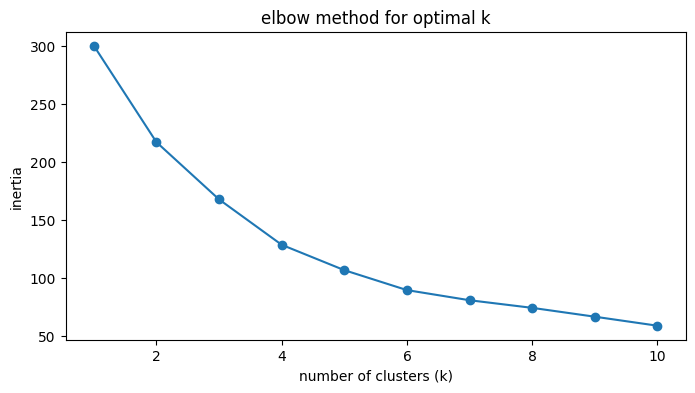

In [7]:
import matplotlib.pyplot as plt

#plot the elbow method graph
plt.figure(figsize= (8,4)) #plt.figure(figsize= (6,2))
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')
plt.title('elbow method for optimal k')
plt.show()

In [8]:
#applying k-means with optimal clusters
#apply k-means with the optimal number of clusters (4)
optimal_kmeans = KMeans( n_clusters=4, random_state=42)
optimal_kmeans.fit(X_scaled)

df['optimalCluster']=optimal_kmeans.labels_
print(df.head())

   customerID  age  annualIncome  spendingScore  cluster  optimalCluster
0           1   56         76228             97        1               1
1           2   69         63984              1        0               3
2           3   46         55774             19        0               2
3           4   32         17568              2        2               2
4           5   60         77592             53        0               3


C:\Users\Hoi Yee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


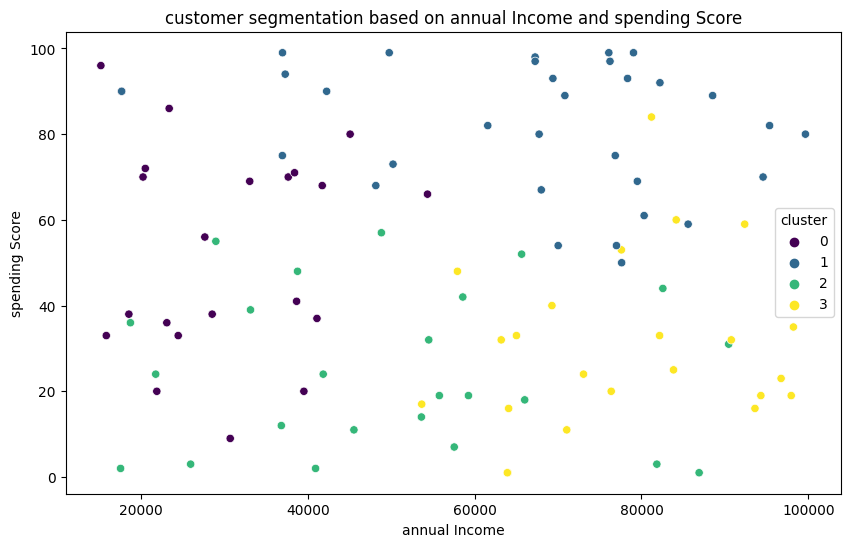

In [10]:
import seaborn as sns

#visualization of clusters
plt.figure(figsize= (10,6)) #plt.figure(figsize= (6,2))
sns.scatterplot(x='annualIncome', y='spendingScore', hue='optimalCluster',
data=df, palette='viridis')

plt.xlabel('annual Income')
plt.ylabel('spending Score')
plt.title('customer segmentation based on annual Income and spending Score')
plt.legend(title='cluster')

plt.show()
